In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('/content/drive/MyDrive/AISpark/scaled_data/train_scaled.csv')

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
test = pd.read_csv('/content/drive/MyDrive/AISpark/scaled_data/test_scaled.csv')

In [6]:
train

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,-0.240260,-0.540834,0.0,-0.281630,-0.571429,-0.531048,-0.437590,0
1,0.655844,0.698068,0.0,0.664373,0.660767,0.706286,0.505143,0
2,-0.032468,-0.250085,0.0,-0.059291,-0.282343,-0.240762,-0.174110,0
3,0.266234,0.159268,0.0,0.253044,0.124737,0.167619,0.148545,0
4,-0.038961,-0.255507,0.0,-0.063526,-0.287400,-0.246095,-0.174110,0
...,...,...,...,...,...,...,...,...
2458,0.207792,0.082684,0.0,0.194812,0.048883,0.091429,0.092809,7
2459,0.051948,-0.138258,0.0,0.025940,-0.171091,-0.129524,-0.072715,7
2460,-0.500000,-0.897323,0.0,-0.553732,-0.926254,-0.887619,-0.807244,7
2461,-0.487013,-0.879702,0.0,-0.540498,-0.908555,-0.870095,-0.789840,7


In [7]:
test

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,0.382550,0.299934,0.0,0.341372,0.256260,0.304576,0.255637,0
1,0.483221,0.429993,0.0,0.443730,0.387312,0.435109,0.355373,0
2,-0.147651,-0.399469,0.0,-0.211147,-0.447412,-0.398350,-0.313396,0
3,0.174497,0.025879,0.0,0.124866,-0.019199,0.029257,0.047798,0
4,0.080537,-0.098208,0.0,0.026795,-0.144407,-0.096024,-0.060619,0
...,...,...,...,...,...,...,...,...
7384,0.120805,-0.045123,0.0,0.068596,-0.090985,-0.042011,-0.012046,7
7385,-0.308725,-0.605839,0.0,-0.374062,-0.655259,-0.606152,-0.501036,7
7386,-0.255034,-0.540810,0.0,-0.322615,-0.589316,-0.540135,-0.432943,7
7387,-0.234899,-0.515594,0.0,-0.302787,-0.564274,-0.514629,-0.419471,7


In [8]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 22.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [9]:
import os
import pandas as pd
import numpy as np
#import tensorflow.compat.v1 as tf
from sklearn.preprocessing import MinMaxScaler
#from sklearn.externals import joblib
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
from tensorflow.compat.v1 import set_random_seed
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

In [10]:
x_test, x_valid, y_test, y_valid = train_test_split(train, train, test_size = 0.3, random_state=5, shuffle=False)

In [11]:
x_test

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,-0.240260,-0.540834,0.0,-0.281630,-0.571429,-0.531048,-0.437590,0
1,0.655844,0.698068,0.0,0.664373,0.660767,0.706286,0.505143,0
2,-0.032468,-0.250085,0.0,-0.059291,-0.282343,-0.240762,-0.174110,0
3,0.266234,0.159268,0.0,0.253044,0.124737,0.167619,0.148545,0
4,-0.038961,-0.255507,0.0,-0.063526,-0.287400,-0.246095,-0.174110,0
...,...,...,...,...,...,...,...,...
1719,-0.428571,-0.794985,0.0,-0.475384,-0.824273,-0.785524,-0.688108,4
1720,-0.155844,-0.422907,0.0,-0.191636,-0.454277,-0.413714,-0.322514,4
1721,0.889610,1.023382,0.0,0.913182,0.984408,1.031619,0.682649,4
1722,0.785714,0.883090,0.0,0.806247,0.845343,0.891429,0.608982,4


In [12]:
print(x_test.shape)
print(x_valid.shape)
print(y_test.shape)
print(y_valid.shape)

(1724, 8)
(739, 8)
(1724, 8)
(739, 8)


In [13]:
'''
train=train.to_numpy()
x_test=x_test.to_numpy()
x_valid=x_valid.to_numpy()
y_test=y_test.to_numpy()
y_valid=y_valid.to_numpy()
'''

'\ntrain=train.to_numpy()\nx_test=x_test.to_numpy()\nx_valid=x_valid.to_numpy()\ny_test=y_test.to_numpy()\ny_valid=y_valid.to_numpy()\n'

In [18]:
x_test_reshape = x_test.values.reshape(x_test.shape[0], 1, x_test.shape[1])
x_valid_reshape = x_valid.values.reshape(x_valid.shape[0], 1, x_valid.shape[1])
train_reshape = train.values.reshape(train.shape[0], 1, train.shape[1])

In [19]:
train

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,-0.240260,-0.540834,0.0,-0.281630,-0.571429,-0.531048,-0.437590,0
1,0.655844,0.698068,0.0,0.664373,0.660767,0.706286,0.505143,0
2,-0.032468,-0.250085,0.0,-0.059291,-0.282343,-0.240762,-0.174110,0
3,0.266234,0.159268,0.0,0.253044,0.124737,0.167619,0.148545,0
4,-0.038961,-0.255507,0.0,-0.063526,-0.287400,-0.246095,-0.174110,0
...,...,...,...,...,...,...,...,...
2458,0.207792,0.082684,0.0,0.194812,0.048883,0.091429,0.092809,7
2459,0.051948,-0.138258,0.0,0.025940,-0.171091,-0.129524,-0.072715,7
2460,-0.500000,-0.897323,0.0,-0.553732,-0.926254,-0.887619,-0.807244,7
2461,-0.487013,-0.879702,0.0,-0.540498,-0.908555,-0.870095,-0.789840,7


In [21]:
'''
train_reshape=train.reshape(train.shape[0], 1, train.shape[1])
x_test_reshape=x_test.reshape(x_test.shape[0], 1, x_test.shape[1])
x_valid_reshape=x_valid.reshape(x_valid.shape[0], 1, x_valid.shape[1])
'''
print(train_reshape.shape)
print(x_test_reshape.shape)
print(x_valid_reshape.shape)


(2463, 1, 8)
(1724, 1, 8)
(739, 1, 8)


## **LSTM AE 모델**

In [22]:
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)
    model = Model(inputs=inputs, outputs=output)
    return model
    #hidden layer 조정하기
    #encoder 140, 70
    #decoder 70, 140

In [23]:
model = autoencoder_model(train_reshape)
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 8)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 16)             1600      
                                                                 
 lstm_1 (LSTM)               (None, 4)                 336       
                                                                 
 repeat_vector (RepeatVector  (None, 1, 4)             0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 1, 4)              144       
                                                                 
 lstm_3 (LSTM)               (None, 1, 16)             1344      
                                                             

# **오토인코더 모델 생성/학습 및 평가**

In [24]:
import tensorflow as tf
from tensorflow import keras

In [25]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [26]:
#오토인코더 모델 생성
model = autoencoder_model(train_reshape)
model.compile(optimizer='adam', loss='mae')

#모델 학습 및 평가
epochs = 100 #1000
batch_size = 10 #32
callbacks = [EarlyStopping(monitor='val_loss', patience=5)]
history1 = model.fit(train_reshape, train_reshape, epochs=epochs, validation_data=[x_valid_reshape, y_valid],batch_size=batch_size, callbacks=callbacks)

Epoch 1/100
247/247 [==============================] - 21s 34ms/step - loss: 0.7094 - val_loss: 0.6862
Epoch 2/100
247/247 [==============================] - 5s 20ms/step - loss: 0.4484 - val_loss: 0.4596
Epoch 3/100
247/247 [==============================] - 6s 22ms/step - loss: 0.2289 - val_loss: 0.4200
Epoch 4/100
247/247 [==============================] - 7s 27ms/step - loss: 0.1710 - val_loss: 0.4155
Epoch 5/100
247/247 [==============================] - 5s 20ms/step - loss: 0.1466 - val_loss: 0.4124
Epoch 6/100
247/247 [==============================] - 7s 30ms/step - loss: 0.1289 - val_loss: 0.4140
Epoch 7/100
247/247 [==============================] - 5s 22ms/step - loss: 0.1055 - val_loss: 0.4077
Epoch 8/100
247/247 [==============================] - 8s 34ms/step - loss: 0.0919 - val_loss: 0.4116
Epoch 9/100
247/247 [==============================] - 6s 23ms/step - loss: 0.0819 - val_loss: 0.4123
Epoch 10/100
247/247 [==============================] - 5s 20ms/step - loss: 0.07

In [27]:
import tensorflow as tf
print(tf.__version__)

2.12.0


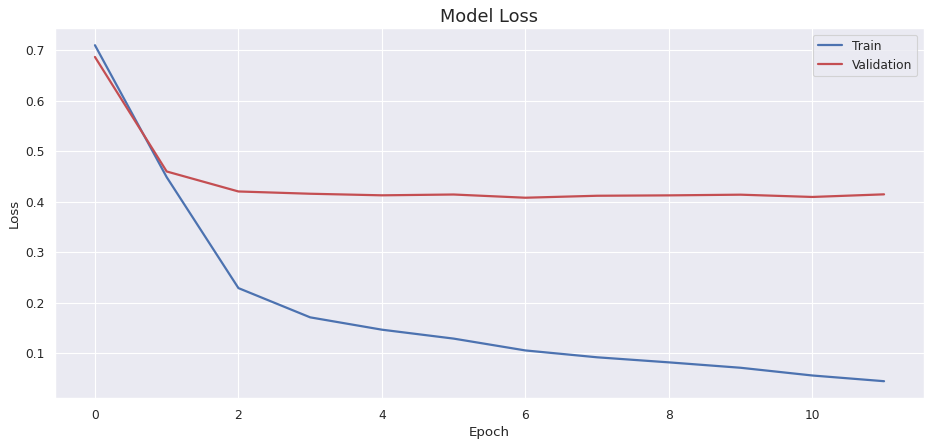

In [28]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history1.history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history1.history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model Loss', fontsize=16)
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

# **최적의 Threshold값 설정**

In [29]:
import sklearn.metrics as metrics

In [30]:
x_valid_reshape

array([[[-0.22077922, -0.51372416,  0.        , ..., -0.50438095,
         -0.40822375,  4.        ]],

       [[ 0.03246753, -0.16130125,  0.        , ..., -0.15238095,
         -0.097576  ,  4.        ]],

       [[-0.36363636, -0.71162318,  0.        , ..., -0.70247619,
         -0.60670502,  4.        ]],

       ...,

       [[-0.5       , -0.89732294,  0.        , ..., -0.88761905,
         -0.80724413,  7.        ]],

       [[-0.48701299, -0.8797018 ,  0.        , ..., -0.87009524,
         -0.78984022,  7.        ]],

       [[ 0.49350649,  0.47509319,  0.        , ...,  0.48380952,
          0.36540346,  7.        ]]])

24/24 [==============================] - 1s 3ms/step
threshold_fixed


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  


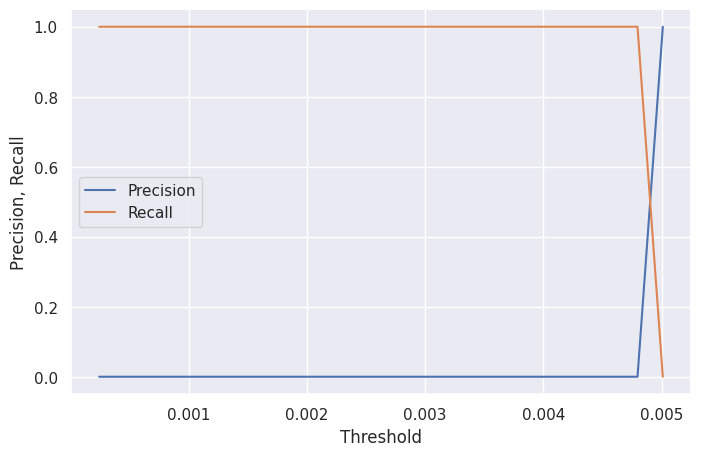

In [31]:
x_pred = model.predict(x_valid_reshape)
pred = x_pred.reshape(x_pred.shape[0], x_pred.shape[2])
x_valid_ = x_valid_reshape.reshape(x_valid_reshape.shape[0], x_valid_reshape.shape[2])

mae = np.mean(np.power(x_valid_-pred, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mae,
                         'True_class': np.zeros(len(y_valid))})

precision_rt, recall_rt, threshold_rt = metrics.precision_recall_curve(error_df['True_class'], error_df['Reconstruction_error'])

best = abs(precision_rt-recall_rt)
threshold_fixed = threshold_rt[np.argmin(best)]
print('threshold_fixed')

plt.figure(figsize=(8, 5))
plt.plot(threshold_rt, precision_rt[1:], label='Precision')
plt.plot(threshold_rt, recall_rt[1:], label='Recall')
plt.xlabel('Threshold');
plt.ylabel('Precision, Recall')
plt.legend()
plt.show()